In this problem set, we will revisit key clustering and dimensionality reduction using Principal Component Analysis (PCA) and k-Means on the Wine dataset.  We’ll also explore visualizing the results, interpreting them, and discussing their implications for a hypothetical wine retailer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

%matplotlib inline
plt.style.use('ggplot')

# Load the Wine dataset
wine_data = load_wine()

df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['label'] = wine_data.target
df.head()

print(wine_data.DESCR)


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [2]:
print(wine_data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


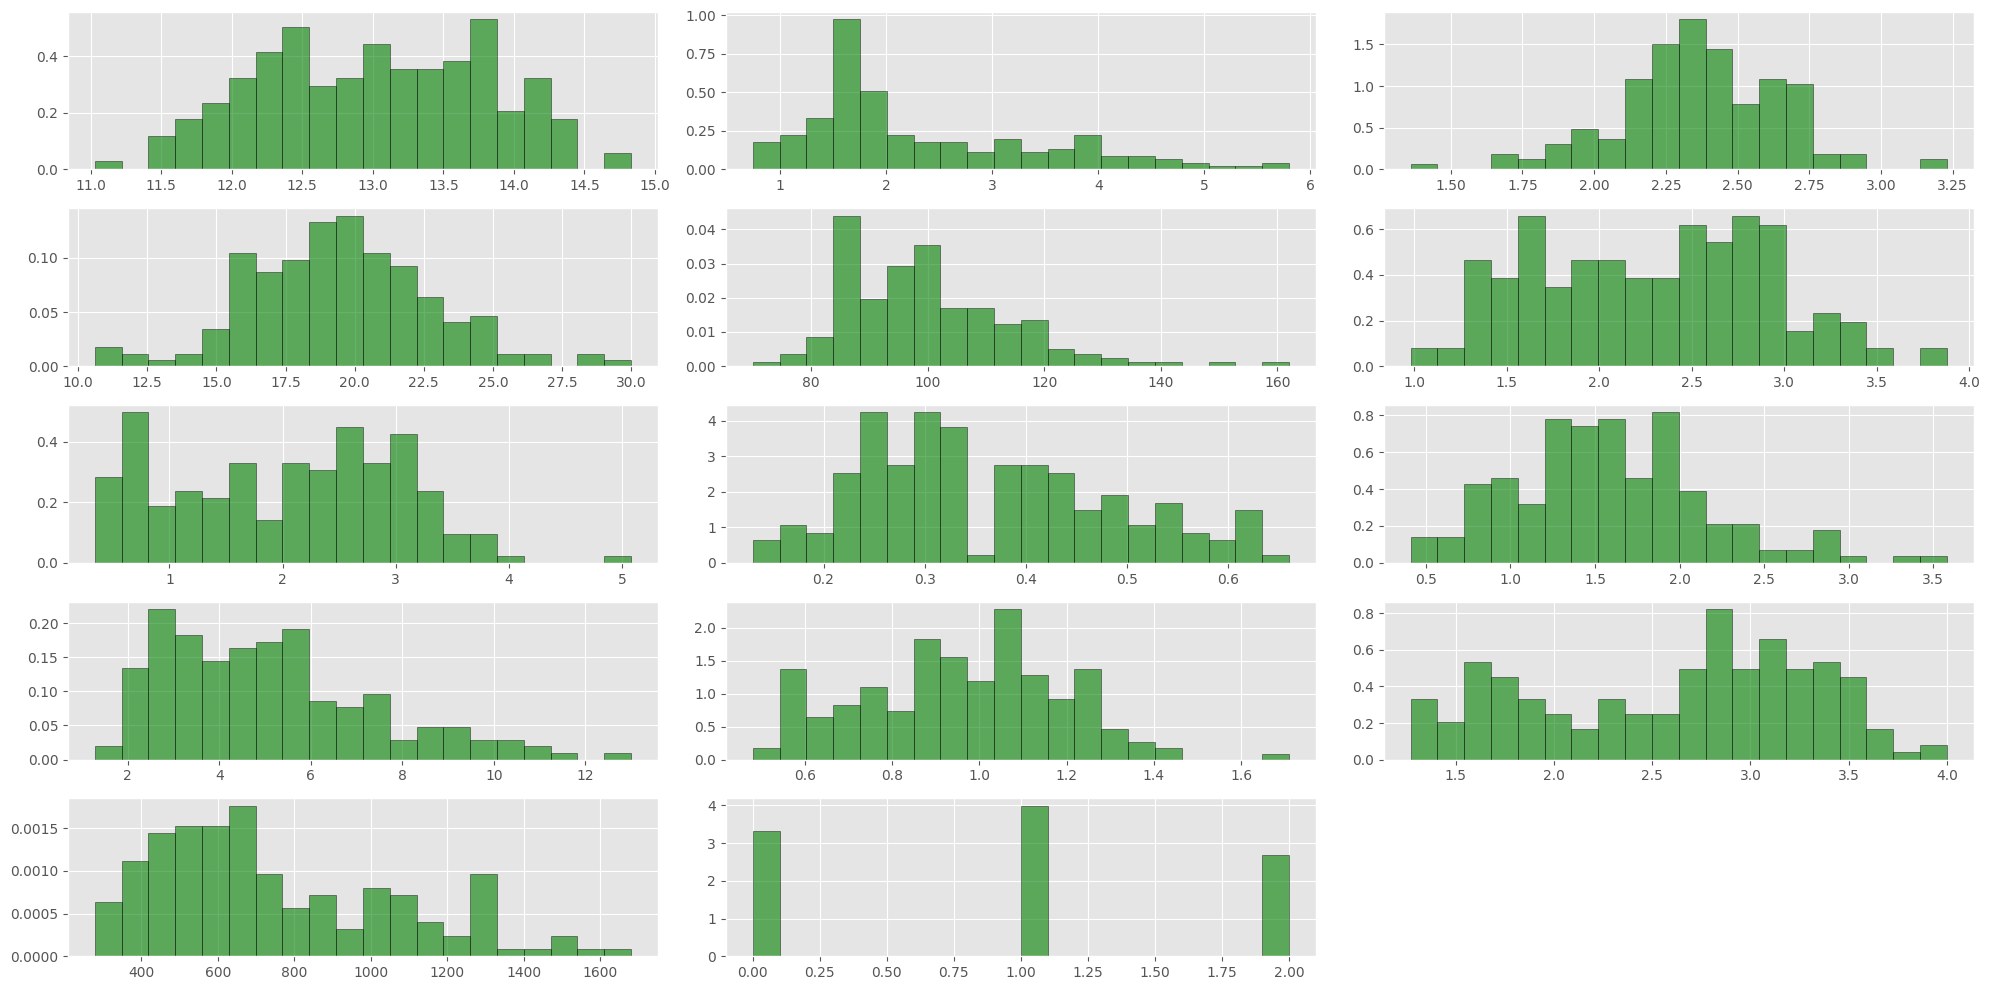

In [3]:
X_wine = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

features = df.columns.to_list()
plt.figure(figsize = (20, 10))
for i in range(0, len(features)):
    plt.subplot(5, 3, i+1)
    plt.hist(df[features[i]], bins=20, color='green', alpha=0.6, edgecolor='black', density=True)
    plt.tight_layout()

Before applying K-means clustering, we need to standardize the data to ensure all features contribute equally to the clustering process.

In [4]:
# Standardize the data
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into
 clusters. Each observation belongs to the cluster with the nearest mean (centroid).

K-means clustering can be used in various scenarios, such as customer segmentation in marketing, anomaly detection or document clustering. In our case, we'll use it to group similar wines together based on their characteristics.

In [5]:
# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_wine_scaled)

Here, we produce a scatterplot with a combination of two features from the dataset, colored to show the k-means clusters.

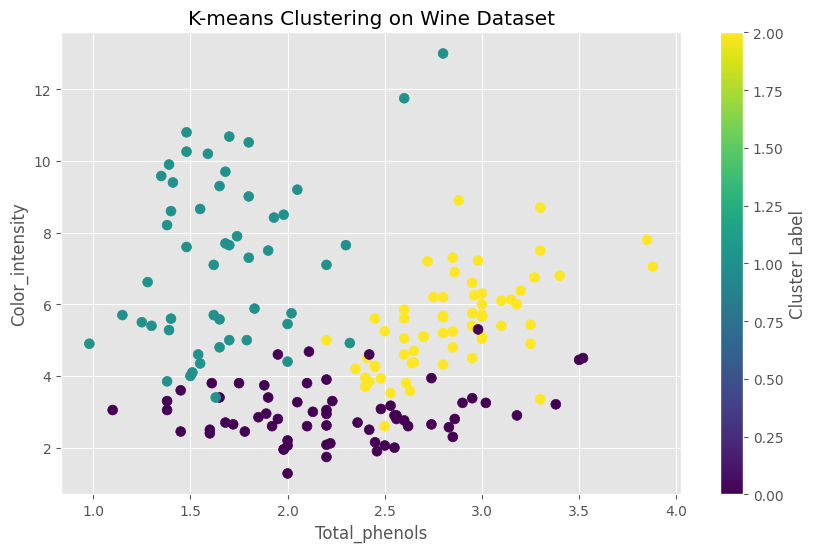

In [6]:
# Choose two features for visualization
feature_1 = 'total_phenols'
feature_2 = 'color_intensity'


# Create a scatter plot for the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_wine[feature_1], X_wine[feature_2], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-means Clustering on Wine Dataset')
plt.xlabel(feature_1.capitalize())
plt.ylabel(feature_2.capitalize())
plt.colorbar(scatter, label='Cluster Label')
plt.show()

The clusters are moderately well separated but has some overlap. There is overlap between green and yellow clusters in the 2.0-3.0 total phenols range, and there is overlap between purple and green cluster in the low color intensity range. While the clusters capture general trends the separation is not perfect.

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms data into a new coordinate system. PCA takes a complex, multi-dimensional dataset and finds a simpler way to represent it that still keeps key information. It's often used to visualize high-dimensional data in 2D or 3D plots, reduce noise in data, compress data while minimizing information loss, or prepare data for machine learning algorithms.

Let's apply PCA to our wine dataset and reduce it to 4 dimensions.

Explained variance by PCA components: [0.36198848 0.1920749  0.11123631 0.0706903 ]


[[<matplotlib.axis.XTick at 0x7a9a9743cb80>,

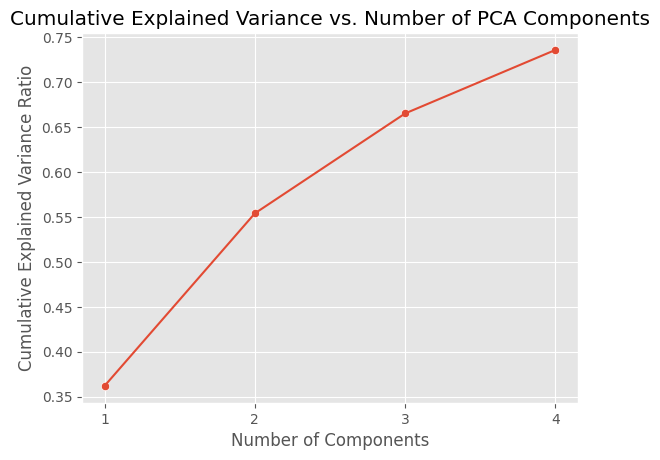

In [7]:
import seaborn as sns

n_components = 4
pca = PCA(n_components=n_components, random_state=211)
X_pca = pca.fit_transform(X_wine_scaled)

explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by PCA components: {explained_variance}')


component_nums = list(range(1, n_components+1))
sns.lineplot(x=component_nums, y=np.cumsum(explained_variance))
ax = sns.scatterplot(x=component_nums, y=np.cumsum(explained_variance))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Cumulative Explained Variance Ratio')
ax.set_title('Cumulative Explained Variance vs. Number of PCA Components')
ax.set(xticks= component_nums)

We can see that PC1 and PC2 accounts for more than 50% of the variance

Now, let's perform K-means clustering on the PCA-reduced dataset and visualize the results.

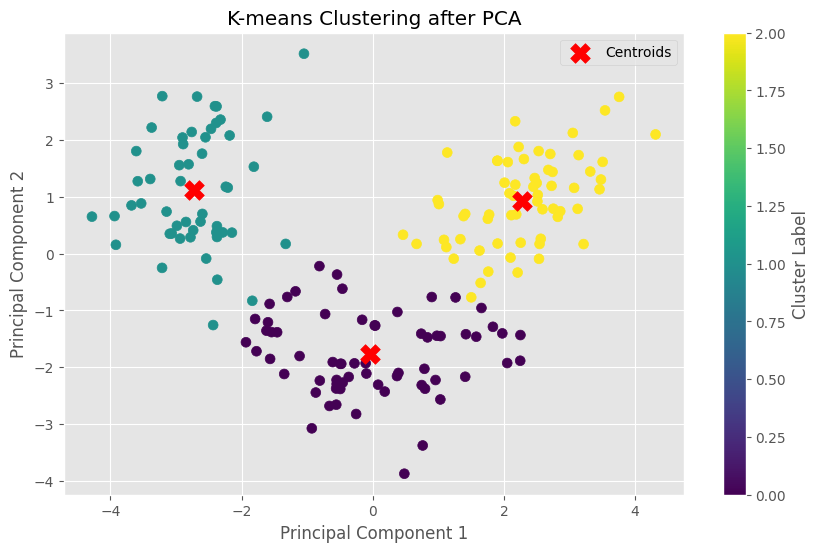

In [8]:
# Perform K-means on the reduced PCA dataset
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_labels_pca = kmeans_pca.fit_predict(X_pca)

# Scatter plot of the clusters in the PCA-reduced space
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels_pca, cmap='viridis', s=50)
plt.title('K-means Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')

# Get the centroids of the clusters after PCA
centroids_pca = kmeans_pca.cluster_centers_

# Plot the centroids on the scatter plot. This will help you visualise how seperated the data is around the cluster
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.legend()
plt.show()

We're also going to compare the quality of clustering before and after PCA using the silhouette score:

In [9]:
df_centroids_pca = pd.DataFrame(centroids_pca, columns=[f'Principal Component {i+1}' for i in range(centroids_pca.shape[1])])
df_centroids_pca.index = [f'Cluster {i+1}' for i in range(centroids_pca.shape[0])]
df_centroids_pca

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4
Cluster 1,-0.036957,-1.772239,0.186139,0.080240
Cluster 2,-2.720036,1.125651,-0.239093,0.062457
Cluster 3,2.276194,0.932054,0.001528,-0.135498


In [10]:
# K-means on the original dataset (without PCA)
kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_labels_original = kmeans_original.fit_predict(X_wine_scaled)

# Compare the clustering results
silhouette_pca = silhouette_score(X_pca, kmeans_labels_pca)
silhouette_original = silhouette_score(X_wine_scaled, kmeans_labels_original)

print(f'Silhouette Score after PCA: {silhouette_pca:.4f}')
print(f'Silhouette Score on Original Data: {silhouette_original:.4f}')

Silhouette Score after PCA: 0.4051
Silhouette Score on Original Data: 0.2849


We can see that the clusters are more well-defined and separated after dimensionality reduction because PCA helped simplifying the dataset, making it easier for K-means to group similar data points together. With PCA-based clustering we can see K-means form tighter clusters. PCA helped filter out irrelevant features enhancing clustering performance. Before PCA, the silhouette score was 0.2849 indicating less distinct clustering. After PCA, the score improved to 0.4051, showing clearer separation between clusters. The PCA-based plot shows more distinct clusters which aligns with the higher silhouette score.

Now let us display the top 5 contributing features for Principal Component 1 (PC1) and Principal Component 2 (PC2).

In [11]:
# Get the PCA component loadings
pca_component_loadings = pd.DataFrame(pca.components_, columns=wine_data.feature_names)
pca_component_loadings

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
1,0.483652,0.224931,0.316069,-0.010591,0.299634,0.065040,-0.003360,0.028779,0.039302,0.529996,-0.279235,-0.164496,0.364903
2,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
3,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071


In [13]:
#  Extract the first PC loadings from the DataFrame by indexing it
pc_1 = pca_component_loadings.loc[0]

# Sort the PC and take the first 5 values
top_5_features_pc_1 = pc_1.abs().sort_values(ascending=False).head(5)

# Do the same thing for the second PC
pc_2 = pca_component_loadings.loc[1]
top_5_features_pc_2 = pc_2.abs().sort_values(ascending=False).head(5)
print(top_5_features_pc_1)
print(top_5_features_pc_2)

flavanoids                      0.422934
total_phenols                   0.394661
od280/od315_of_diluted_wines    0.376167
proanthocyanins                 0.313429
nonflavanoid_phenols            0.298533
Name: 0, dtype: float64
color_intensity    0.529996
alcohol            0.483652
proline            0.364903
ash                0.316069
magnesium          0.299634
Name: 1, dtype: float64


Now let us apply these results in a practical, business-oriented context. Say, we have to choose two features to create distinct sections in our wine store.What will you choose?
I personally would choose total phenols from PC1 and color intensity from PC2 to create distinct sections in my wine store. (I chose total phenols over flavanoids in PC1 since flavanoids are subsets of total phenols and thought total phenols would be more comprehensive) Total phenols reflect the wine's body and texture making it a key differentiator for customers seeking rich and full-bodied wines. Color intensity is an easily distinguishable feature for customers looking for a particular visual style. I believe this combination ensures the store to offer a variety of sections, each highlighting both taste-related and visual characteristics, ensuring broader consumer appeal while maintaining a data-driven approach to segmentation. Real-world marketing strategies would seek to balance technical data with consumer-friendly categories.

The outliers from the k-means clustering result are likely to have unusual values in chemical and visual features like flavanoids and color intensity. In a wine-selling context, marketing these outliers can have two approaches. Firstly, they can be highlighted as unique or rare wines and be marketed as "Exclusive/Premium Selections" attracting customers who're looking for something more special. On the other hand, if these wines don't match general customer preferences and show low selling numbers, they could be offered as discounted products.